This notebook generates the following panels:
- ( ) Example - Openloop: example basic visualisation of open loop (what to put in??)

use env 2p_analysis_cottage

In [1]:
VERSION = 1

In [9]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import defopt
import pickle
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
mpl.rcParams['pdf.fonttype'] = 42 # save text as text not outlines
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
# from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings

from cottage_analysis.depth_analysis.filepath import generate_filepaths
from cottage_analysis.stimulus_structure.sphere_structure import *
from cottage_analysis.depth_analysis.depth_preprocess.process_params import create_speed_arr, create_trace_arr_per_roi, calculate_OF, thr
from cottage_analysis.depth_analysis.plotting.plotting_utils import *
from cottage_analysis.depth_analysis.plotting.basic_vis_plots import *

/camp/home/hey2/.conda/envs/2p_analysis_cottage/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/plotting/plotting_utils.py:458: DeprecationWarning: invalid escape sequence \D
  plt.ylabel("$\Delta$F/F", fontsize=axis_fontsize)
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/plotting/plotting_utils.py:651: DeprecationWarning: invalid escape sequence \D
  plt.ylabel("$\Delta$F/F")
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/plotting/plotting_utils.py:686: DeprecationWarning: invalid escape sequence \D
  plt.ylabel(

In [12]:
def all_basic_plots(roi, 
                    dffs_original, dffs_playback, 
                    stim_dict_original, stim_dict_playback,
                    img_VS_original, img_VS_playback,
                    distance_max,
                    this_depth, depth_list, blank_period, frame_rate,
                    depth_neurons,
                    gaussian_depth_original, gaussian_depth_playback,
                    speeds_original, speeds_playback, 
                    speeds_eye_playback,
                    speed_thr, speed_thr_cal,
                     optics_original, optics_playback,
                    line_colors,
                    heatmap_cmap,
                    plot_cols, plot_rows, fontsize_dict):

    plt.figure(figsize=(plot_cols*5,plot_rows*5))

    log_range = {
        'rs_bin_log_min':0,
        'rs_bin_log_max':2.5,
        'rs_bin_num':6,
        'of_bin_log_min':-1.5,
        'of_bin_log_max':3.5,
        'of_bin_num':11,
        'log_base':10
        }


    # # Raster plot of running speed, Closeloop
    # binned_stats_original = plot_raster_all_depths(values=speeds_original, 
    #                     dffs=dffs_original, 
    #                     depth_list=depth_list, 
    #                     img_VS=img_VS_original, 
    #                     stim_dict=stim_dict_original, 
    #                     distance_bins=60, 
    #                     plot_rows=plot_rows, 
    #                     plot_cols=plot_cols, 
    #                     which_row = 0,
    #                     which_col = 0,
    #                     vmax=None,
    #                     heatmap_cmap=WhRdcmap, 
    #                     fontsize_dict=fontsize_dict, 
    #                     is_trace=False, 
    #                     roi=roi, 
    #                     title=' RS Closeloop', 
    #                     frame_rate=frame_rate)

    # # Raster plot of running speed, Openloop
    # binned_stats_playback = plot_raster_all_depths(values=speeds_playback, 
    #                     dffs=dffs_playback, 
    #                     depth_list=depth_list, 
    #                     img_VS=img_VS_playback, 
    #                     stim_dict=stim_dict_playback, 
    #                     distance_bins=60, 
    #                     plot_rows=plot_rows, 
    #                     plot_cols=plot_cols, 
    #                     which_row = 0,
    #                     which_col = 2,
    #                     vmax=np.nanmax(binned_stats_original['binned_yrr'])*100,
    #                     heatmap_cmap=WhRdcmap, 
    #                     fontsize_dict=fontsize_dict, 
    #                     is_trace=False, 
    #                     roi=roi, 
    #                     title=' RS Openloop', 
    #                     frame_rate=frame_rate)

    # # Raster plot of dFF, Closeloop
    # binned_stats_original = plot_raster_all_depths(values=dffs_original, 
    #                     dffs=dffs_original, 
    #                     depth_list=depth_list, 
    #                     img_VS=img_VS_original, 
    #                     stim_dict=stim_dict_original, 
    #                     distance_bins=60, 
    #                     plot_rows=plot_rows, 
    #                     plot_cols=plot_cols, 
    #                     which_row = 0,
    #                     which_col = 1,
    #                     vmax=None,
    #                     heatmap_cmap=WhRdcmap, 
    #                     fontsize_dict=fontsize_dict, 
    #                     is_trace=True, 
    #                     roi=roi, 
    #                     title=' dFF Closeloop', 
    #                     frame_rate=frame_rate)

    # # Raster plot of dFF, Openloop
    # binned_stats_playback = plot_raster_all_depths(values=dffs_playback, 
    #                     dffs=dffs_playback, 
    #                     depth_list=depth_list, 
    #                     img_VS=img_VS_playback, 
    #                     stim_dict=stim_dict_playback, 
    #                     distance_bins=60, 
    #                     plot_rows=plot_rows, 
    #                     plot_cols=plot_cols, 
    #                     which_row = 0,
    #                     which_col = 3,
    #                     vmax=np.nanmax(binned_stats_original['binned_yrr']),
    #                     heatmap_cmap=WhRdcmap, 
    #                     fontsize_dict=fontsize_dict, 
    #                     is_trace=True, 
    #                     roi=roi, 
    #                     title=' dFF Openloop', 
    #                     frame_rate=frame_rate)

    # # PSTH RS, Closeloop
    # plt.subplot2grid([plot_rows,plot_cols],[len(depth_list),0])
    # binned_stats, xlim, ylim = plot_PSTH(values=speeds_original, 
    #                                     dffs=dffs_original,  
    #                                     depth_list=depth_list, 
    #                                     img_VS=img_VS_original, 
    #                                     stim_dict=stim_dict_original, 
    #                                     distance_bins=60,
    #                                     line_colors=line_colors,
    #                                     heatmap_cmap=WhRdcmap, 
    #                                     fontsize_dict=fontsize_dict, 
    #                                     is_trace=False, 
    #                                     roi=1, 
    #                                     title='', 
    #                                     ylim=None,
    #                                     frame_rate=15, 
    #                                     distance_max=600,
    #                                     )

    # # PSTH RS, Openloop
    # plt.subplot2grid([plot_rows,plot_cols],[len(depth_list),2])
    # binned_stats, _,_ = plot_PSTH(values=speeds_playback, 
    #                                     dffs=dffs_playback,  
    #                                     depth_list=depth_list, 
    #                                     img_VS=img_VS_playback, 
    #                                     stim_dict=stim_dict_playback, 
    #                                     distance_bins=60,
    #                                     line_colors=line_colors,
    #                                     heatmap_cmap=WhRdcmap, 
    #                                     fontsize_dict=fontsize_dict, 
    #                                     is_trace=False, 
    #                                     roi=1, 
    #                                     title='', 
    #                                     ylim=ylim,
    #                                     frame_rate=15, 
    #                                     distance_max=600,
    #                                     )


    # # PSTH RS, Closeloop
    # plt.subplot2grid([plot_rows,plot_cols],[len(depth_list),1])
    # binned_stats, xlim, ylim = plot_PSTH(values=dffs_original, 
    #                                     dffs=dffs_original,  
    #                                     depth_list=depth_list, 
    #                                     img_VS=img_VS_original, 
    #                                     stim_dict=stim_dict_original, 
    #                                     distance_bins=60,
    #                                     line_colors=line_colors,
    #                                     heatmap_cmap=WhRdcmap, 
    #                                     fontsize_dict=fontsize_dict, 
    #                                     is_trace=True, 
    #                                     roi=1, 
    #                                     title='', 
    #                                     ylim=None,
    #                                     frame_rate=15, 
    #                                     distance_max=600,
    #                                     )

    # # PSTH RS, Openloop
    # plt.subplot2grid([plot_rows,plot_cols],[len(depth_list),3])
    # binned_stats, _,_ = plot_PSTH(values=dffs_playback, 
    #                                     dffs=dffs_playback,  
    #                                     depth_list=depth_list, 
    #                                     img_VS=img_VS_playback, 
    #                                     stim_dict=stim_dict_playback, 
    #                                     distance_bins=60,
    #                                     line_colors=line_colors,
    #                                     heatmap_cmap=WhRdcmap, 
    #                                     fontsize_dict=fontsize_dict, 
    #                                     is_trace=True, 
    #                                     roi=1, 
    #                                     title='', 
    #                                     ylim=ylim,
    #                                     frame_rate=15, 
    #                                     distance_max=600,
    #                                     )

    # Depth tuning curve, closeloop
    plt.subplot2grid([plot_rows,plot_cols],[0,0])
    plot_depth_tuning_curve(dffs=dffs_original, 
                            speeds=speeds_original, 
                            roi=roi, 
                            speed_thr_cal=speed_thr_cal, 
                            depth_list=depth_list, 
                            stim_dict=stim_dict_original, 
                            depth_neurons=depth_neurons,
                            gaussian_depth=gaussian_depth_original, 
                            fontsize_dict=fontsize_dict, 
                            ylim=None, 
                            frame_rate=15,
                            this_depth=this_depth)
    ylim_tuning = plt.gca().get_ylim()
    plt.ylim((-0.1,ylim_tuning[1]))
    plt.ylabel('\u0394F/F', fontsize=fontsize_dict['ylabel'])
    # plt.title('Depth tuning (closed loop)', fontsize = fontsize_dict['title'])

    # Depth tuning curve, openloop
    plt.subplot2grid([plot_rows,plot_cols],[0,4])
    plot_depth_tuning_curve(dffs=dffs_playback, 
                            speeds=speeds_playback, 
                            roi=roi, 
                            speed_thr_cal=speed_thr_cal, 
                            depth_list=depth_list, 
                            stim_dict=stim_dict_playback,
                            depth_neurons=depth_neurons,
                            gaussian_depth=gaussian_depth_playback, 
                            fontsize_dict=fontsize_dict, 
                            ylim=None, 
                            frame_rate=15,
                            this_depth=this_depth)
    plt.ylabel('\u0394F/F', fontsize=fontsize_dict['ylabel'])
    plt.ylim((-0.1,ylim_tuning[1]))
    # plt.title('Depth tuning (open loop)', fontsize = fontsize_dict['title'])


    # RS-OF Heatmap, Closeloop
    plt.subplot2grid([plot_rows,plot_cols],[0,3])
    extended_matrix = get_RS_OF_heatmap_matrix(speeds=speeds_original, 
                        optics=optics_original, 
                        roi=roi,
                        dffs=dffs_original, 
                        depth_list=depth_list, 
                        img_VS=img_VS_original, 
                        stim_dict=stim_dict_original, 
                        log_range=log_range, 
                        playback=False, 
                        speed_thr=0.01, 
                        of_thr=0.03)
    plot_RS_OF_heatmap_extended(matrix=extended_matrix, 
                    log_range=log_range, 
                    playback=False, 
                    fontsize_dict=fontsize_dict, 
                    log=True,
                    xlabel='Running Speed (cm/s)', 
                    ylabel='Optic Flow (degree/s)', 
                    vmin=None, 
                    vmax=None)
    vmin = np.nanmin(extended_matrix)
    vmax = np.nanmax(extended_matrix)
    plt.xlabel('Running speed (cm/s)', fontsize=fontsize_dict['xlabel'])
    plt.ylabel('Optic flow speed (degrees/s)', fontsize=fontsize_dict['ylabel'])

    # RS-OF Heatmap, Openloop (actual RS)
    plt.subplot2grid([plot_rows,plot_cols],[0,7])
    extended_matrix = get_RS_OF_heatmap_matrix(speeds=speeds_playback, 
                        optics=optics_playback, 
                        roi=roi,
                        dffs=dffs_playback, 
                        depth_list=depth_list, 
                        img_VS=img_VS_playback, 
                        stim_dict=stim_dict_playback, 
                        log_range=log_range, 
                        playback=True, 
                        speed_thr=0.01, 
                        of_thr=0.03)
    plot_RS_OF_heatmap_extended(matrix=extended_matrix, 
                    log_range=log_range, 
                    playback=True, 
                    fontsize_dict=fontsize_dict, 
                    log=True,
                    xlabel='Actual running Speed (cm/s)', 
                    ylabel='Optic Flow (degree/s)', 
                    vmin=vmin, 
                    vmax=vmax)
    plt.xlabel('Running speed (cm/s)', fontsize=fontsize_dict['xlabel'])
    plt.ylabel('Optic flow speed (degrees/s)', fontsize=fontsize_dict['ylabel'])

    # # RS-OF Heatmap, Openloop (virtual RS)
    # plt.subplot2grid([plot_rows,plot_cols],[1,9])
    # extended_matrix = get_RS_OF_heatmap_matrix(speeds=speeds_eye_playback, 
    #                     optics=optics_playback, 
    #                     roi=roi,
    #                     dffs=dffs_playback, 
    #                     depth_list=depth_list, 
    #                     img_VS=img_VS_playback, 
    #                     stim_dict=stim_dict_playback, 
    #                     log_range=log_range, 
    #                     playback=False, 
    #                     speed_thr=0.01, 
    #                     of_thr=0.03)
    # plot_RS_OF_heatmap_extended(matrix=extended_matrix, 
    #                 log_range=log_range, 
    #                 playback=False, 
    #                 fontsize_dict=fontsize_dict, 
    #                 log=True,
    #                 xlabel='Virtual running Speed (cm/s)', 
    #                 ylabel='Optic Flow (degree/s)', 
    #                 vmin=vmin, 
    #                 vmax=vmax)
    # plt.xlabel('Virtual running speed (cm/s)', fontsize=fontsize_dict['xlabel'])
    # plt.ylabel('Optic flow speed (degrees/s)', fontsize=fontsize_dict['ylabel'])


    # ---Line plot dFF - RS Closeloop ---
    # Closeloop arrays
    trace_arr_noblank_original, _ = create_trace_arr_per_roi(roi, dffs_original, depth_list, stim_dict_original,
                                                    mode='sort_by_depth', protocol='fix_length',
                                                    blank_period=0, frame_rate=frame_rate)
    trace_arr_blank_original, _ = create_trace_arr_per_roi(roi, dffs_original, depth_list, stim_dict_original,
                                                    mode='sort_by_depth', protocol='fix_length',
                                                    isStim=False, blank_period=0,
                                                    frame_rate=frame_rate)
    rs_arr_noblank_original, _ = create_speed_arr(speeds_original, depth_list, stim_dict_original, mode='sort_by_depth',
                                            protocol='fix_length', blank_period=0)
    rs_arr_blank_original, _ = create_speed_arr(speeds_original, depth_list, stim_dict_original, mode='sort_by_depth',
                                            protocol='fix_length', isStim=False, blank_period=0)
    of_arr_noblank_original, _ = create_speed_arr(optics_original, depth_list, stim_dict_original, mode='sort_by_depth',
                                            protocol='fix_length', blank_period=0)

    # Openloop arrays
    trace_arr_noblank_playback, _ = create_trace_arr_per_roi(roi, dffs_playback, depth_list, stim_dict_playback,
                                                    mode='sort_by_depth', protocol='fix_length',
                                                    blank_period=0, frame_rate=frame_rate)
    trace_arr_blank_playback, _ = create_trace_arr_per_roi(roi, dffs_playback, depth_list, stim_dict_playback,
                                                    mode='sort_by_depth', protocol='fix_length',
                                                    isStim=False, blank_period=0,
                                                    frame_rate=frame_rate)
    rs_arr_noblank_playback, _ = create_speed_arr(speeds_playback, depth_list, stim_dict_playback, mode='sort_by_depth',
                                            protocol='fix_length', blank_period=0)
    rs_arr_blank_playback, _ = create_speed_arr(speeds_playback, depth_list, stim_dict_playback, mode='sort_by_depth',
                                            protocol='fix_length', isStim=False, blank_period=0)
    of_arr_noblank_playback, _ = create_speed_arr(optics_playback, depth_list, stim_dict_playback, mode='sort_by_depth',
                                            protocol='fix_length', blank_period=0)
    # plt.subplot2grid([plot_rows,plot_cols],[0,6])
    # xlim_rs_nonlog_closeloop, ylim_rs_nonlog_closeloop = plot_dFF_binned_speed(
    #     speed_arr=thr(speed_arr_noblank_original * 100, speed_thr * 100), trace_arr=trace_arr_noblank_original,
    #     speed_bins=15, depth_list=depth_list,
    #     speed_arr_blank=thr(speed_arr_blank_original * 100, speed_thr * 100),
    #     trace_arr_blank=trace_arr_blank_original,
    #     title='dF/F - RS (Closeloop)', xlabel='Running speed (cm/s)',
    #     linecolors=line_colors, fontsize=fontsize_dict['title'],
    #     axis_fontsize=fontsize_dict['xlabel'])
    # plt.xticks(fontsize=fontsize_dict['xticks'])
    # plt.yticks(fontsize=fontsize_dict['yticks'])
    # plt.legend(fontsize=fontsize_dict['legend'], framealpha=0.5)
    # despine()

    # ---Line plot dFF - log(RS), Closeloop---
    plt.subplot2grid([plot_rows,plot_cols],[0,1])
    xlim_rs_log_closeloop, ylim_rs_log_closeloop = plot_dFF_binned_speed(
        speed_arr=np.log(thr(speed_arr_noblank_original * 100, speed_thr * 100)),
        trace_arr=trace_arr_noblank_original,
        speed_bins=15, depth_list=depth_list,
        speed_arr_blank=np.log(thr(speed_arr_blank_original * 100, speed_thr * 100)),
        trace_arr_blank=trace_arr_blank_original,
        log=True,
        title='', xlabel='Running speed (cm/s)',
        linecolors=line_colors, fontsize=fontsize_dict['title'],
        axis_fontsize=fontsize_dict['xlabel'])
    plt.xticks(fontsize=fontsize_dict['xticks'])
    plt.yticks(fontsize=fontsize_dict['yticks'])
    plt.legend(fontsize=fontsize_dict['legend'], framealpha=0.5)
    despine()

    # # ---Line plot dFF - OF, Closeloop ---
    # plt.subplot2grid([plot_rows,plot_cols],[2,6])
    # xlim_of_nonlog_closeloop, ylim_of_nonlog_closeloop = plot_dFF_binned_speed(speed_arr=np.degrees(of_arr_noblank_original),
    #                                     trace_arr=trace_arr_noblank_original,
    #                                     speed_bins=50, depth_list=depth_list,
    #                                     ylim=None,
    #                                     title='dF/F - OF (Closeloop)',
    #                                     xlabel='Optic flow speed (degree/s)',
    #                                     linecolors=line_colors, fontsize=fontsize_dict['title'],
    #     axis_fontsize=fontsize_dict['xlabel'])
    # plt.xticks(fontsize=fontsize_dict['xticks'])
    # plt.yticks(fontsize=fontsize_dict['yticks'])
    # plt.legend(fontsize=fontsize_dict['legend'], framealpha=0.5)
    # despine()

    # ---Line plot dFF - log(OF), Closeloop ---
    plt.subplot2grid([plot_rows,plot_cols],[0,2])
    xlim_of_log_closeloop, ylim_of_log_closeloop = plot_dFF_binned_speed(speed_arr=np.log(np.degrees(of_arr_noblank_original)),
                                        trace_arr=trace_arr_noblank_original,
                                        speed_bins=15, depth_list=depth_list,
                                        log=True, ylim=None,
                                        title='',
                                        xlabel='Optic flow speed (degree/s)',
                                        linecolors=line_colors, fontsize=fontsize_dict['title'],
        axis_fontsize=fontsize_dict['xlabel'])
    plt.xticks(fontsize=fontsize_dict['xticks'])
    plt.yticks(fontsize=fontsize_dict['yticks'])
    plt.legend(fontsize=fontsize_dict['legend'], framealpha=0.5)
    despine()


    # # ---Line plot dFF - RS Openloop ---
    # plt.subplot2grid([plot_rows,plot_cols],[0,7])
    # xlim_line_nonlog_playback, ylim_line_nonlog_playback = plot_dFF_binned_speed(
    #     speed_arr=thr(speed_arr_noblank_playback * 100, speed_thr * 100), trace_arr=trace_arr_noblank_playback,
    #     speed_bins=15, depth_list=depth_list,
    #     speed_arr_blank=thr(speed_arr_blank_playback * 100, speed_thr * 100),
    #     trace_arr_blank=trace_arr_blank_playback,
    #     ylim=ylim_of_nonlog_closeloop,
    #     title='dF/F - RS (Openloop)', xlabel='Running speed (cm/s)',
    #     linecolors=line_colors, fontsize=fontsize_dict['title'],
    #     axis_fontsize=fontsize_dict['xlabel'])
    # plt.xticks(fontsize=fontsize_dict['xticks'])
    # plt.yticks(fontsize=fontsize_dict['yticks'])
    # plt.legend(fontsize=fontsize_dict['legend'], framealpha=0.5)
    # despine()

    # ---Line plot dFF - log(RS), Openloop---
    plt.subplot2grid([plot_rows,plot_cols],[0,5])
    xlim_line_log_playback, ylim_line_log_playback = plot_dFF_binned_speed(
        speed_arr=np.log(thr(speed_arr_noblank_playback * 100, speed_thr * 100)),
        trace_arr=trace_arr_noblank_playback,
        speed_bins=15, depth_list=depth_list,
        speed_arr_blank=np.log(thr(speed_arr_blank_playback * 100, speed_thr * 100)),
        trace_arr_blank=trace_arr_blank_playback,
        ylim=ylim_rs_log_closeloop,
        log=True,
        title='', xlabel='Running speed (cm/s)',
        linecolors=line_colors, fontsize=fontsize_dict['title'],
        axis_fontsize=fontsize_dict['xlabel'])
    plt.xticks(fontsize=fontsize_dict['xticks'])
    plt.yticks(fontsize=fontsize_dict['yticks'])
    plt.legend(fontsize=fontsize_dict['legend'], framealpha=0.5)
    despine()

    # # ---Line plot dFF - OF, Openloop ---
    # plt.subplot2grid([plot_rows,plot_cols],[2,7])
    # xlim1, _ = plot_dFF_binned_speed(speed_arr=np.degrees(of_arr_noblank_playback),
    #                                     trace_arr=trace_arr_noblank_playback,
    #                                     speed_bins=50, depth_list=depth_list,
    #                                     ylim=ylim_of_nonlog_closeloop,
    #                                     title='dF/F - OF (Openloop)',
    #                                     xlabel='Optic flow speed (degree/s)',
    #                                     linecolors=line_colors, fontsize=fontsize_dict['title'],
    #     axis_fontsize=fontsize_dict['xlabel'])
    # plt.xticks(fontsize=fontsize_dict['xticks'])
    # plt.yticks(fontsize=fontsize_dict['yticks'])
    # plt.legend(fontsize=fontsize_dict['legend'], framealpha=0.5)
    # despine()


    # ---Line plot dFF - log(OF), Openloop ---
    plt.subplot2grid([plot_rows,plot_cols],[0,6])
    xlim2, _ = plot_dFF_binned_speed(speed_arr=np.log(np.degrees(of_arr_noblank_playback)),
                                        trace_arr=trace_arr_noblank_playback,
                                        speed_bins=15, depth_list=depth_list,
                                        log=True, ylim=ylim_of_log_closeloop,
                                        title='',
                                        xlabel='Optic flow speed (degree/s)',
                                        linecolors=line_colors, fontsize=fontsize_dict['title'],
        axis_fontsize=fontsize_dict['xlabel'])
    plt.xticks(fontsize=fontsize_dict['xticks'])
    plt.yticks(fontsize=fontsize_dict['yticks'])
    plt.legend(fontsize=fontsize_dict['legend'], framealpha=0.5)
    despine()

    plt.tight_layout(pad=1)

/camp/home/hey2/.conda/envs/2p_analysis_cottage/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/camp/home/hey2/.conda/envs/2p_analysis_cottage/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---START STEP 1--- 
 Getting data filepaths...


<ipython-input-13-53824aa58ac0>:30: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  original_files['trace_folder'] = generate_filepaths.generate_file_folders(
<ipython-input-13-53824aa58ac0>:30: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  original_files['trace_folder'] = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:129: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:134: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(
<ipython-input-13-53824aa58ac0>:43: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  playbac

---STEP 1 FINISHED.--- 

---START STEP 2--- 
 Load files...
---STEP 2 FINISHED.--- 

---START STEP 3--- 
 Plotting...


<ipython-input-13-53824aa58ac0>:149: RuntimeWarning: Mean of empty slice
  speed_arr_mean_original = np.nanmean(speed_arr_original,axis=1)
<ipython-input-13-53824aa58ac0>:151: RuntimeWarning: Mean of empty slice
  speed_arr_noblank_mean_original = np.nanmean(speed_arr_noblank_original,axis=1)
<ipython-input-13-53824aa58ac0>:170: RuntimeWarning: Mean of empty slice
  speed_arr_mean_playback = np.nanmean(speed_arr_playback,axis=1)
<ipython-input-13-53824aa58ac0>:172: RuntimeWarning: Mean of empty slice
  speed_arr_noblank_mean_playback = np.nanmean(speed_arr_noblank_playback,axis=1)
<ipython-input-13-53824aa58ac0>:192: DeprecationWarning: flexilims_session will become mandatory
  sess_analysis_folder = generate_filepaths.generate_analysis_session_folder(root=root, project=project, mouse=mouse, session=session)
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/plotting/plotting_utils.py:412: UserWarning: linestyle is redundantly defined by the 'l

ROI0


/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/plotting/plotting_utils.py:412: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/plotting/plotting_utils.py:412: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/plotting/plotting_utils.py:412: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_a

ROI1
---STEP 3 FINISHED.--- 



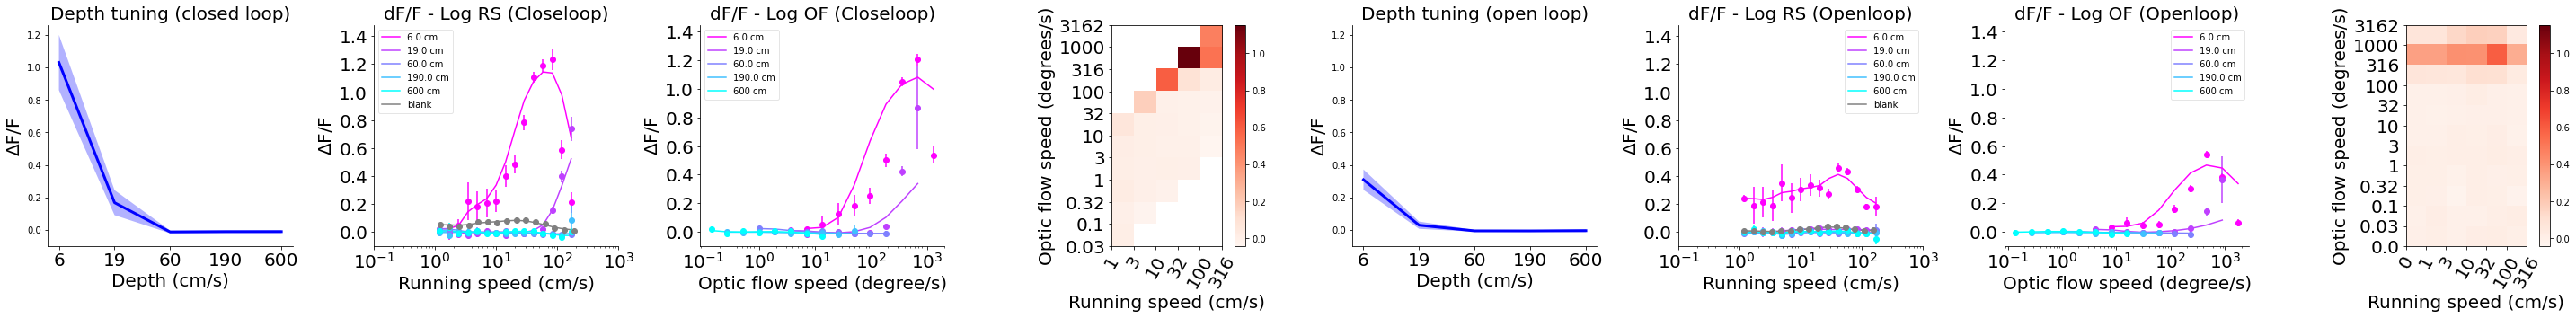

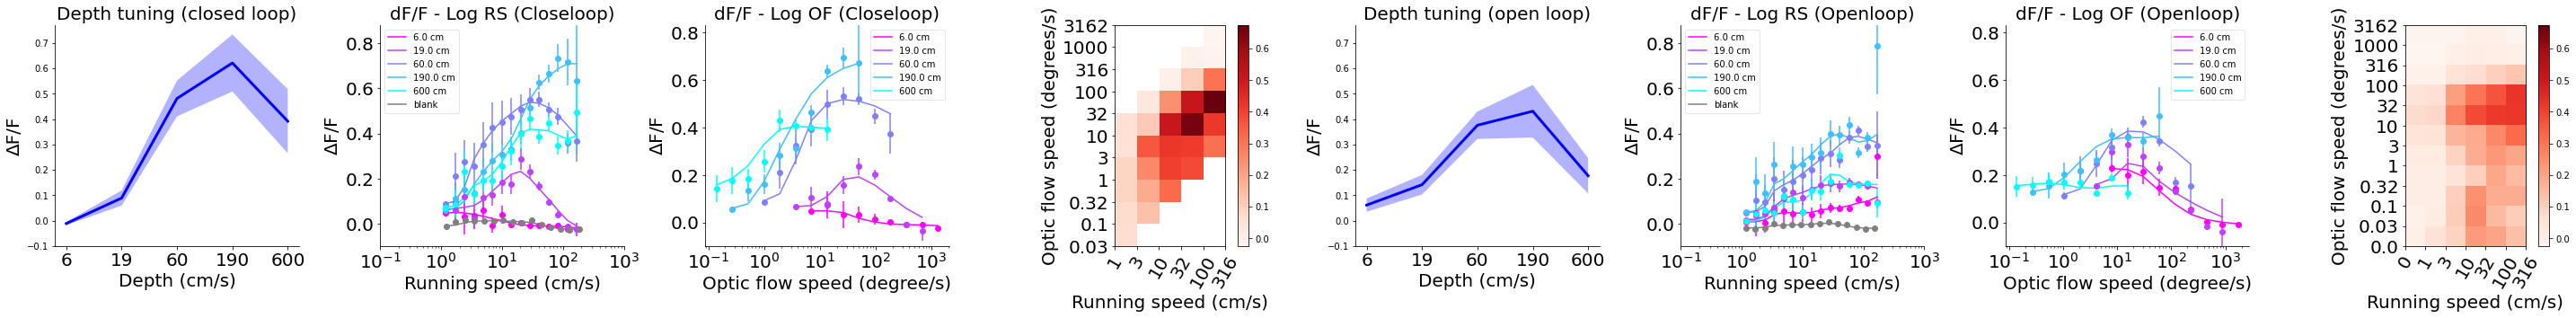

In [13]:
# ----- SETUPS -----
save_root = save_root = '/camp/lab/znamenskiyp/home/shared/presentations/Cosyne2023/ver'+str(VERSION)+'/open_loop_examples/'
if not os.path.exists(save_root):
    os.makedirs(save_root)
    
rawdata_root = '/camp/lab/znamenskiyp/data/instruments/raw_data/projects/'
root = '/camp/lab/znamenskiyp/home/shared/projects/'

project='hey2_3d-vision_foodres_20220101'
mouse='PZAH6.4b'
session='S20220524'
protocol='SpheresPermTubeReward'

depth_list = [0.06, 0.19, 0.6, 1.9, 6]
choose_trials = 50
frame_rate = 15
speed_thr_cal = 0.2  # m/s, threshold for running speed when calculating depth neurons
speed_thr = 0.01  #m/s
manual_choose_rois = True
manually_chosen_rois =[0,1] #[0, 85, 161, 7, 19, 39, 5, 10, 17, 1, 43, 146, 4, 229, 284]
distance_max = 6

# ----- STEP1: Generate file path -----
print('---START STEP 1---', '\n', 'Getting data filepaths...', flush=True)
original_files = {}
original_files['rawdata_folder'], \
original_files['protocol_folder'], \
original_files['analysis_folder'], \
original_files['suite2p_folder'], \
original_files['trace_folder'] = generate_filepaths.generate_file_folders(
    project=project,
    mouse=mouse,
    session=session,
    protocol=protocol,
    rawdata_root=rawdata_root,
    root=root)

playback_files = {}
playback_files['rawdata_folder'], \
playback_files['protocol_folder'], \
playback_files['analysis_folder'], \
playback_files['suite2p_folder'], \
playback_files['trace_folder'] = generate_filepaths.generate_file_folders(
    project=project,
    mouse=mouse,
    session=session,
    protocol=protocol+'Playback',
    rawdata_root=rawdata_root,
    root=root)

# print(original_files)
# print(playback_files)
print('---STEP 1 FINISHED.---', '\n', flush=True)

# ----- STEP2: Load files-----
# We only use depth neurons selected from close loop to do the analysis
print('---START STEP 2---', '\n', 'Load files...', flush=True)
# Load suite2p files
ops = np.load(original_files['suite2p_folder']/'ops.npy', allow_pickle=True)
ops = ops.item()
iscell = np.load(original_files['suite2p_folder']/'iscell.npy', allow_pickle=True)[:, 0]
F = np.load(original_files['trace_folder']/'F.npy', allow_pickle=True)
# Fast = np.load(trace_folder + 'Fast.npy', allow_pickle=True)
# Fneu = np.load(trace_folder + 'Fneu.npy', allow_pickle=True)
# spks = np.load(trace_folder + 'spks.npy', allow_pickle=True)

# All_rois
which_rois = (np.arange(F.shape[0]))[iscell.astype('bool')]

# dffs_ast
dffs_original = np.load(original_files['trace_folder']/'dffs_ast.npy')
dffs_playback = np.load(playback_files['trace_folder']/'dffs_ast.npy')

# Load stim structure file
with open(original_files['protocol_folder']/'img_VS.pickle', 'rb') as handle:
    img_VS_original = pickle.load(handle)
if os.path.exists(original_files['protocol_folder']/'stim_dict.pickle'):
    with open(original_files['protocol_folder']/'stim_dict.pickle', 'rb') as handle:
        stim_dict_original = pickle.load(handle)
else:
    stim_dict_original = create_stim_dict(depth_list=depth_list, img_VS=img_VS_original, choose_trials=choose_trials)
with open(original_files['analysis_folder']/'plane0/gaussian_depth_tuning_fit_new_0.5.pickle', 'rb') as handle:
    gaussian_depth_original = pickle.load(handle)

with open(playback_files['protocol_folder']/'img_VS.pickle', 'rb') as handle:
    img_VS_playback = pickle.load(handle)
if os.path.exists(playback_files['protocol_folder']/'stim_dict.pickle'):
    with open(playback_files['protocol_folder']/'stim_dict.pickle', 'rb') as handle:
        stim_dict_playback = pickle.load(handle)
else:
    stim_dict_playback = create_stim_dict(depth_list=depth_list, img_VS=img_VS_playback, choose_trials=choose_trials)
with open(playback_files['analysis_folder']/'plane0/gaussian_depth_tuning_fit_new_0.5.pickle', 'rb') as handle:
    gaussian_depth_playback = pickle.load(handle)

# Load depth neurons
depth_neurons = np.load(original_files['analysis_folder']/'plane0/depth_neurons.npy')
max_depths_original = np.load(original_files['analysis_folder']/'plane0/max_depths_index.npy')
# max_depths_gaussian_fit = np.load(original_files['analysis_folder'] + 'plane0/max_LogDepth_gaussianfit.npy')
max_depths_playback = np.load(playback_files['analysis_folder']/'plane0/max_depths_index.npy')
# max_depths_gaussian_fit = np.load(playback_files['analysis_folder'] + 'plane0/max_LogDepth_gaussianfit.npy')
print('---STEP 2 FINISHED.---', '\n', flush=True)

# ----- STEP3: Plotting -----
print('---START STEP 3---', '\n', 'Plotting...', flush=True)
# SETUP
dff_plot_max = 3
blank_period = 5
fontsize = 20
speed_bins = 15
frame_rate = 15

plot_rows = 1
plot_cols = 8

# Colormap
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(1, 1, N)
vals[:, 1] = np.linspace(1, 0, N)
vals[:, 2] = np.linspace(1, 0, N)
WhRdcmap = ListedColormap(vals)

cmap = cm.cool.reversed()
line_colors = []
norm = mpl.colors.Normalize(vmin=np.log(min(depth_list)), vmax=np.log(max(depth_list)))
for depth in depth_list:
    rgba_color = cmap(norm(np.log(depth)),bytes=True)
    rgba_color = tuple(it/255 for it in rgba_color)
    line_colors.append(rgba_color)
    
fontsize_dict = {
'xlabel':20,
'ylabel':20,
'xticks':20,
'yticks':20,
'title':20,
'legend':10
}

# PARAMS PROCESSING
# Speed array
# Running speed is thresholded with a small threshold to get rid of non-zero values (default threshold 0.01)
# Closeloop
speeds_original = img_VS_original.MouseZ.diff() / img_VS_original.HarpTime.diff() # with no playback. EyeZ and MouseZ should be the same.
speeds_original[0] = 0
speeds_original = thr(speeds_original, speed_thr)
speed_arr_original, _ = create_speed_arr(speeds_original, depth_list, stim_dict_original, mode='sort_by_depth', protocol='fix_length',
                                blank_period=0, frame_rate=frame_rate)
speed_arr_mean_original = np.nanmean(speed_arr_original,axis=1)
speed_arr_noblank_original,_ = create_speed_arr(speeds_original, depth_list, stim_dict_original, mode='sort_by_depth', protocol='fix_length', blank_period=0, frame_rate=frame_rate)
speed_arr_noblank_mean_original = np.nanmean(speed_arr_noblank_original,axis=1)
speed_arr_blank_original,_ = create_speed_arr(speeds_original, depth_list, stim_dict_original, mode='sort_by_depth', protocol='fix_length', isStim=False, blank_period=0, frame_rate=frame_rate)
frame_num_pertrial_max_original = speed_arr_noblank_original.shape[2]
total_trials_original = speed_arr_noblank_original.shape[1]
optics_original = calculate_OF(rs=speeds_original, img_VS=img_VS_original, mode='no_RF')

# Array of distance travelled from each trial start (m)
distance_arr_original, _ = create_speed_arr(img_VS_original['EyeZ'], depth_list, stim_dict_original, mode='sort_by_depth',
                                    protocol='fix_length', blank_period=0, frame_rate=frame_rate)
for idepth in range(distance_arr_original.shape[0]):
    for itrial in range(distance_arr_original.shape[1]):
        distance_arr_original[idepth, itrial, :] = distance_arr_original[idepth, itrial, :] - distance_arr_original[idepth, itrial, 0]

# Openloop
speeds_playback = img_VS_playback.MouseZ.diff() / img_VS_playback.HarpTime.diff() # with no playback. EyeZ and MouseZ should be the same.
speeds_playback[0] = 0
speeds_playback = thr(speeds_playback, speed_thr)
speed_arr_playback, _ = create_speed_arr(speeds_playback, depth_list, stim_dict_playback, mode='sort_by_depth', protocol='fix_length',
                                blank_period=0, frame_rate=frame_rate)
speed_arr_mean_playback = np.nanmean(speed_arr_playback,axis=1)
speed_arr_noblank_playback,_ = create_speed_arr(speeds_playback, depth_list, stim_dict_playback, mode='sort_by_depth', protocol='fix_length', blank_period=0, frame_rate=frame_rate)
speed_arr_noblank_mean_playback = np.nanmean(speed_arr_noblank_playback,axis=1)
speed_arr_blank_playback,_ = create_speed_arr(speeds_playback, depth_list, stim_dict_playback, mode='sort_by_depth', protocol='fix_length', isStim=False, blank_period=0, frame_rate=frame_rate)
frame_num_pertrial_max_playback = speed_arr_noblank_playback.shape[2]
total_trials_playback = speed_arr_noblank_playback.shape[1]

speeds_eye_playback = img_VS_playback.EyeZ.diff() / img_VS_playback.HarpTime.diff()  # EyeZ is how the perspective of animal moves
speeds_eye_playback[0] = 0
speeds_eye_playback = thr(speeds_eye_playback, speed_thr)
optics_playback = calculate_OF(rs=speeds_eye_playback, img_VS=img_VS_playback, mode='no_RF')


# Array of distance travelled from each trial start (m)
distance_arr_playback, _ = create_speed_arr(img_VS_playback['EyeZ'], depth_list, stim_dict_playback, mode='sort_by_depth',
                                    protocol='fix_length', blank_period=0, frame_rate=frame_rate)
for idepth in range(distance_arr_playback.shape[0]):
    for itrial in range(distance_arr_playback.shape[1]):
        distance_arr_playback[idepth, itrial, :] = distance_arr_playback[idepth, itrial, :] - distance_arr_playback[idepth, itrial, 0]


# PLOTTING
sess_analysis_folder = generate_filepaths.generate_analysis_session_folder(root=root, project=project, mouse=mouse, session=session)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    if manual_choose_rois:
        select_rois = manually_chosen_rois
        for choose_roi in select_rois:
            roi = choose_roi
            all_basic_plots(roi=roi, 
                            dffs_original=dffs_original, dffs_playback=dffs_playback,
                            img_VS_original = img_VS_original, img_VS_playback = img_VS_playback,
                            stim_dict_original=stim_dict_original,
                            stim_dict_playback=stim_dict_playback,
                            distance_max=distance_max,
                            this_depth=5, depth_list=depth_list, blank_period=blank_period,
                            frame_rate=frame_rate,
                            depth_neurons=depth_neurons,
                            gaussian_depth_original=gaussian_depth_original, 
                            gaussian_depth_playback=gaussian_depth_playback,
                            speeds_original=speeds_original,
                            speeds_playback=speeds_playback,
                            speeds_eye_playback=speeds_eye_playback,
                            speed_thr=speed_thr, speed_thr_cal=speed_thr_cal,
                            optics_original=optics_original, optics_playback=optics_playback,
                            line_colors=line_colors,
                            heatmap_cmap=WhRdcmap,
                            plot_cols=plot_cols, plot_rows=plot_rows, fontsize_dict=fontsize_dict)

            plt.savefig(save_root + 'roi'+ str(choose_roi)+'.pdf')
            # plt.close()
            print('ROI' + str(choose_roi), flush=True)


print('---STEP 3 FINISHED.---', '\n', flush=True)